In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [21]:
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
riv_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__20000000.gl5'
rivout = np.fromfile(riv_path, dtype='float32').reshape(2160, 4320)

In [24]:
city_len = 50

msk_dir = f'{h08dir}/global_city/dat/vld_cty_'
cnt_dir = f'{h08dir}/global_city/dat/cty_cnt_/gpw4'
prf_dir = f'{h08dir}/global_city/dat/cty_prf_'

LDP = []

for i in range(city_len):
    city_num = i+1
    
    msk_path = f'{msk_dir}/city_{city_num:08}.gl5'
    msk = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
    
    pop_msk = np.ma.masked_where(msk != 1, pop)
    pop_sum = np.sum(pop_msk)

    prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
    prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
    supply = np.ma.masked_where(msk != 1, rivout)
    supply_sum = np.sum(supply) * 60 * 60 * 24
    
    little = np.round(supply_sum/pop_sum, 4)
    print(city_num, little)

1 8588.8445
2 18926.2153
3 12514.9948
4 1402.5162
5 4127.3598
6 15140.3649
7 14371.4451
8 8362.5646
9 804141.7497
10 1414.1225
11 9295.8378
12 1958.2636
13 30274.974
14 856.4697
15 304.2291
16 1452.5894
17 777.3515
18 6321.3712
19 5046.7652
20 749684.8943
21 53534.3223
22 48375.4651
23 2750.5629
24 347.8523
25 2122.3426
26 47451.6006
27 837.451
28 5540314.4411
29 17617.9167
30 259.3188
31 3596.1912
32 2703.1444
33 43240.8044
34 6932.2437
35 157.8617
36 348122.9308
37 518.4233
38 9276.6595
39 4570.0334
40 1235.2589
41 628551.0633
42 40917.5163
43 184.0248
44 1403.9949
45 2361.7366
46 13012.6082
47 6323.9577
48 1279739.9413
49 3892.0986
50 7843.5143


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


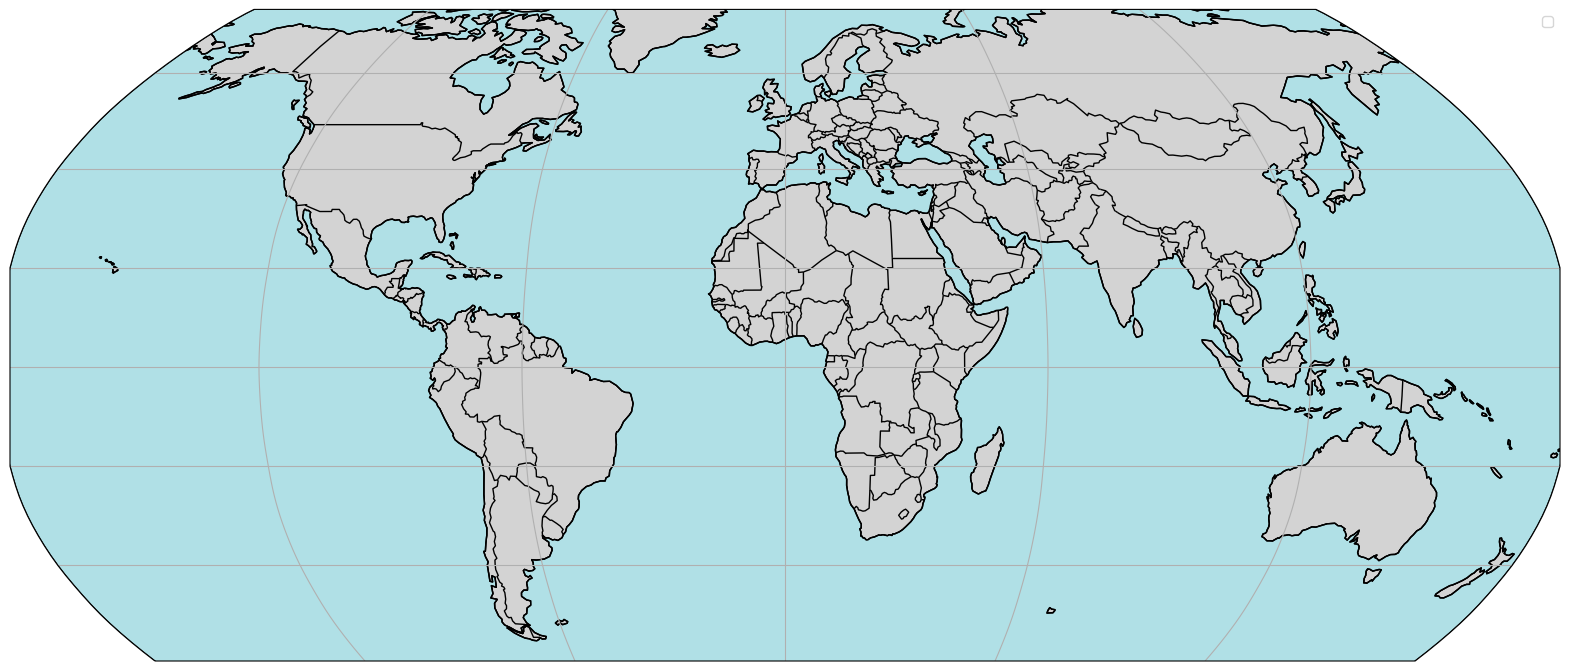

In [12]:
projection = ccrs.Robinson(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-180, 180, -60, 75], crs=crs)

for i in range(city_len):
    city_num = i+1
    legend_labels = ['0 < LDP <=0.1', '0.1 < LDP <= 0.2', '0.2 < LDP <= 0.3', '0.3 < LDP <= 0.4', '0.4 < LDP']
    wsi_0 = False
    wsi_1 = False
    wsi_2 = False
    wsi_3 = False
    wsi_4 = True

for i in range(900):
    label_flag = False
    
    line = lines[i]
    line = line.strip()
    parts = line.split()
    lonmin = float(parts[6])
    lonmax = float(parts[7])
    latmin = float(parts[8])
    latmax = float(parts[9])
    
    loncnt = (lonmax - lonmin)/2 + lonmin
    latcnt = (latmax - latmin)/2 + latmin
    
    wsi = wsi_lst[i]
    if 0<wsi<=0.1:
        color = 'blue'
        if wsi_4 is True:
            label_index = 0
            label_flag = True
            wsi_4 = False
            wsi_0 = True
    elif 0.1<wsi<=0.2:
        color = 'cyan'
        if wsi_0 is True:
            label_index = 1
            label_flag = True
            wsi_0 = False
            wsi_1 = True
    elif 0.2<wsi<=0.3:
        color = 'limegreen'
        if wsi_1 is True:
            label_index = 2
            label_flag = True
            wsi_1 = False
            wsi_2 = True
    elif 0.3<wsi<=0.4:
        color = 'gold'
        if wsi_2 is True:
            label_index = 3
            label_flag = True
            wsi_2 = False
            wsi_3 = True
    elif 0.4<wsi:
        color = 'red'
        if wsi_3 is True:
            label_index = 4
            label_flag = True
            wsi_3 = False
    else:
        color = 'white'
        label_flag = False
        
    if label_flag is True:
        ax.plot(loncnt, latcnt, 'o', markersize=2, color=color, transform=ccrs.PlateCarree(), label=legend_labels[label_index])
    else:
        ax.plot(loncnt, latcnt, 'o', markersize=2, color=color, transform=ccrs.PlateCarree())

ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='powderblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')
plt.legend()